In [1]:
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from matplotlib import rc
from IPython.core.display import display, HTML, set_matplotlib_formats
from soynlp.tokenizer import LTokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [2]:
# display 설정
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# 한글 폰트 설정
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

# 마이너스 깨짐 설정
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

# 화면 설정
set_matplotlib_formats('retina')

In [17]:
def title_to_word(feb):
    title = list(feb['제목'])
    title = [re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', str(t)) for t in title]
    words = []
    tokenizer = LTokenizer()
    for t in title:
        words.append(tokenizer.tokenize(t, flatten=False))
    title_words = []
    for w in words:
        for l in range(len(w)):
            title_words.append(w[l][0])
    return title_words

In [32]:
def draw_wordcloud(title_words,n):
    title_words= [word for word in title_words if word not in ['코로나','코로나19','VI','nan','포토','것"','만에','위해']]
    title_words= [word for word in title_words if len(word) >= 2]
    count = Counter(title_words)
    title_words_common = dict(count.most_common(100))
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(title_words_common) 
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off') 
    
    if len(str(n))==1:
        fig.savefig('c:/Users/soohan/bigcontest/dataset/wordcloud/2020040'+str(n)+'.png')
    else:
        fig.savefig('c:/Users/soohan/bigcontest/dataset/wordcloud/202004'+str(n)+'.png')
    plt.show()

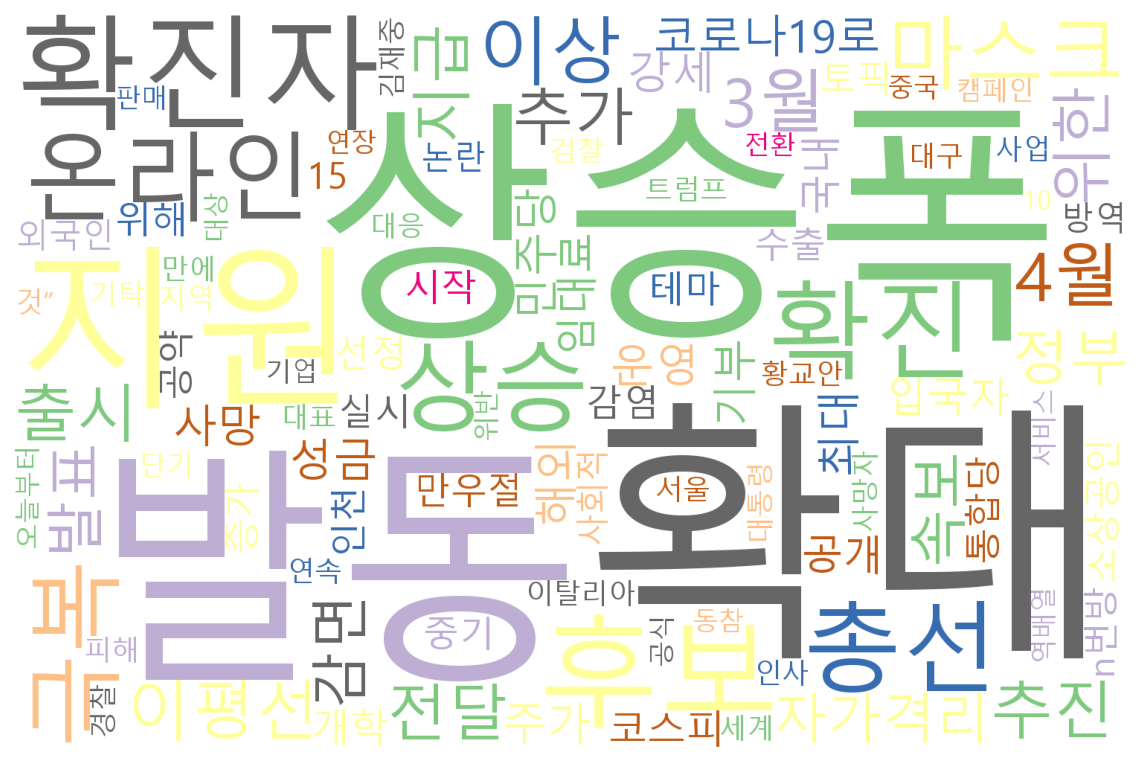

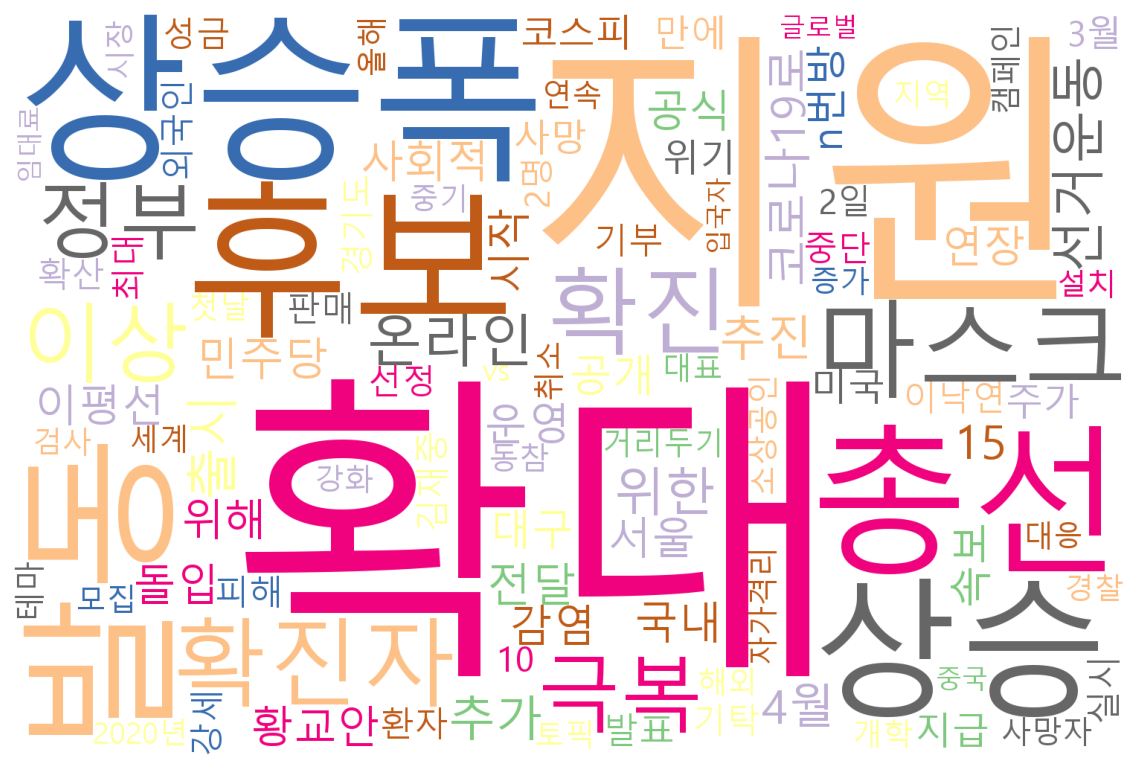

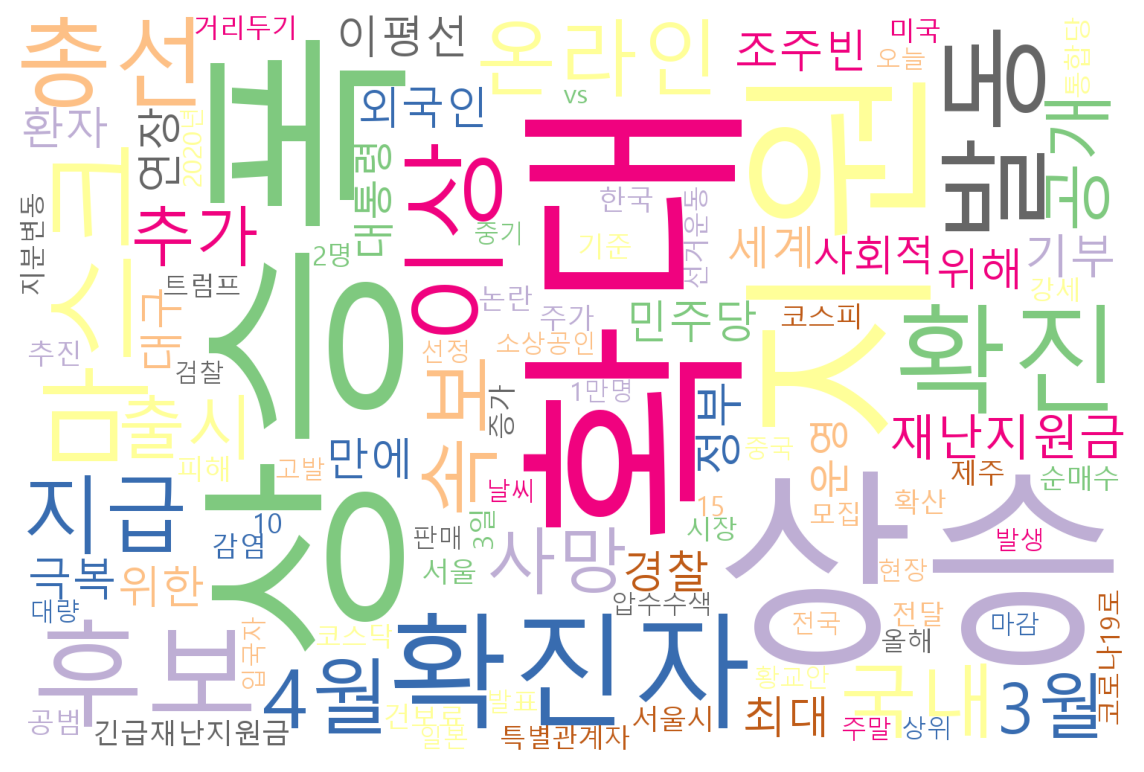

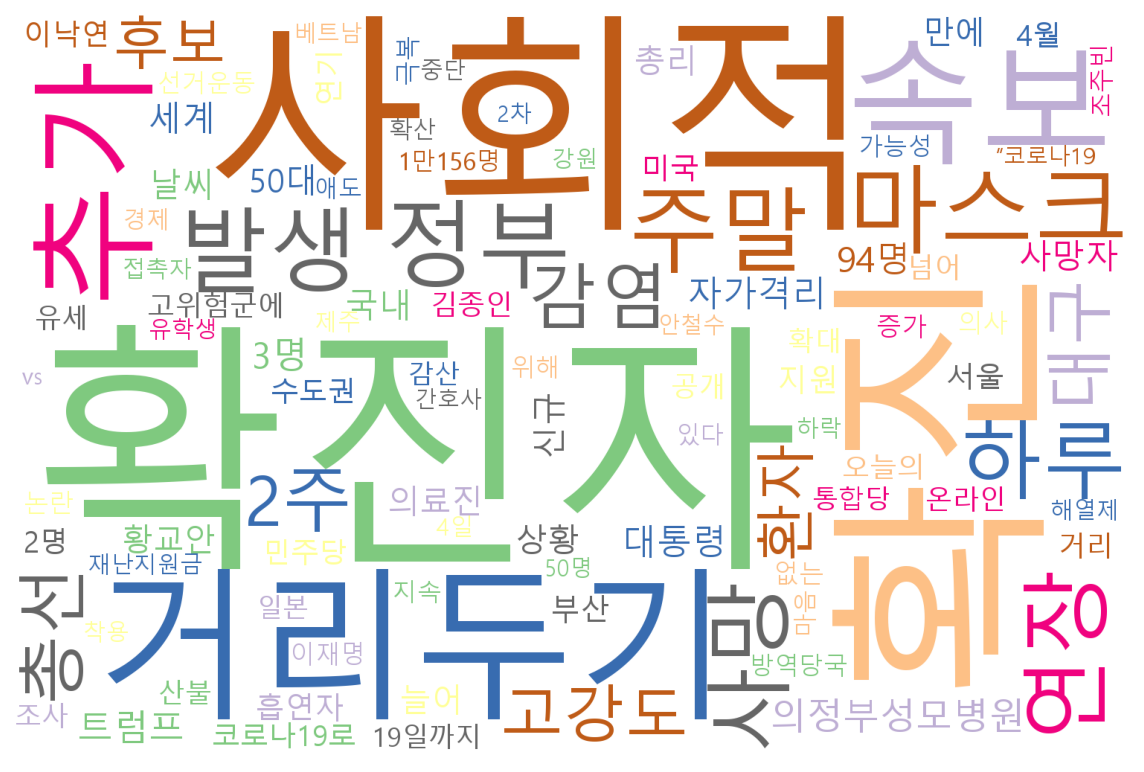

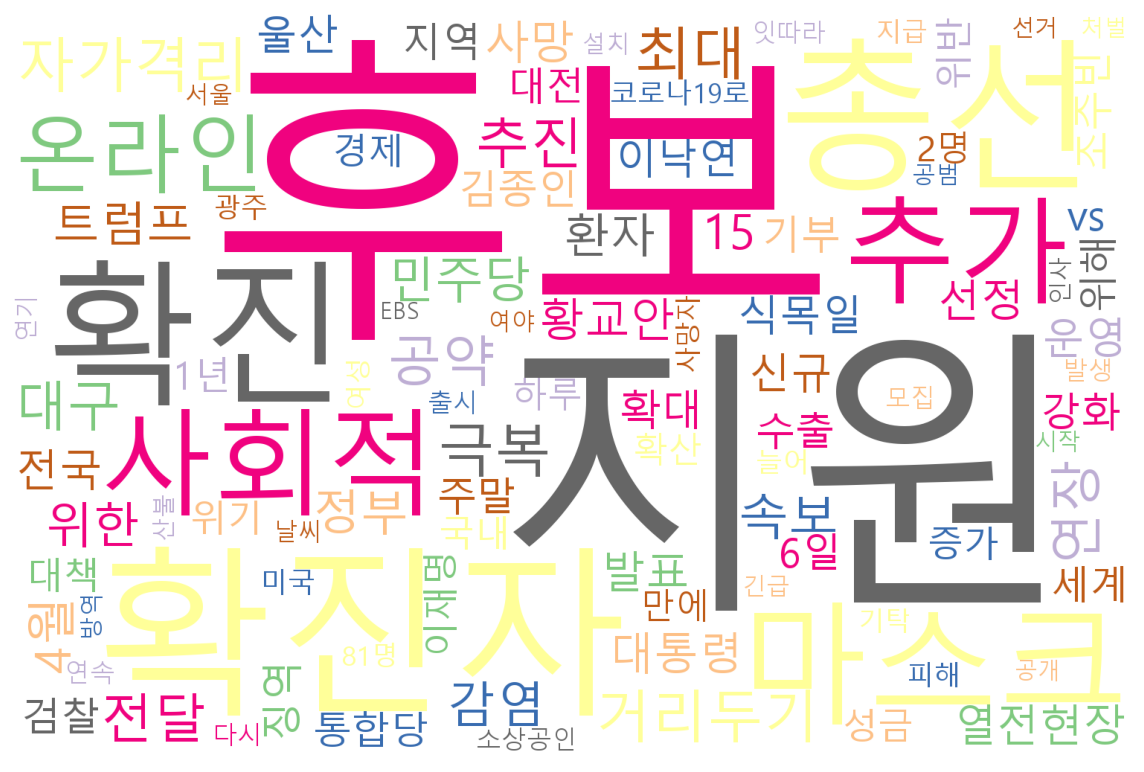

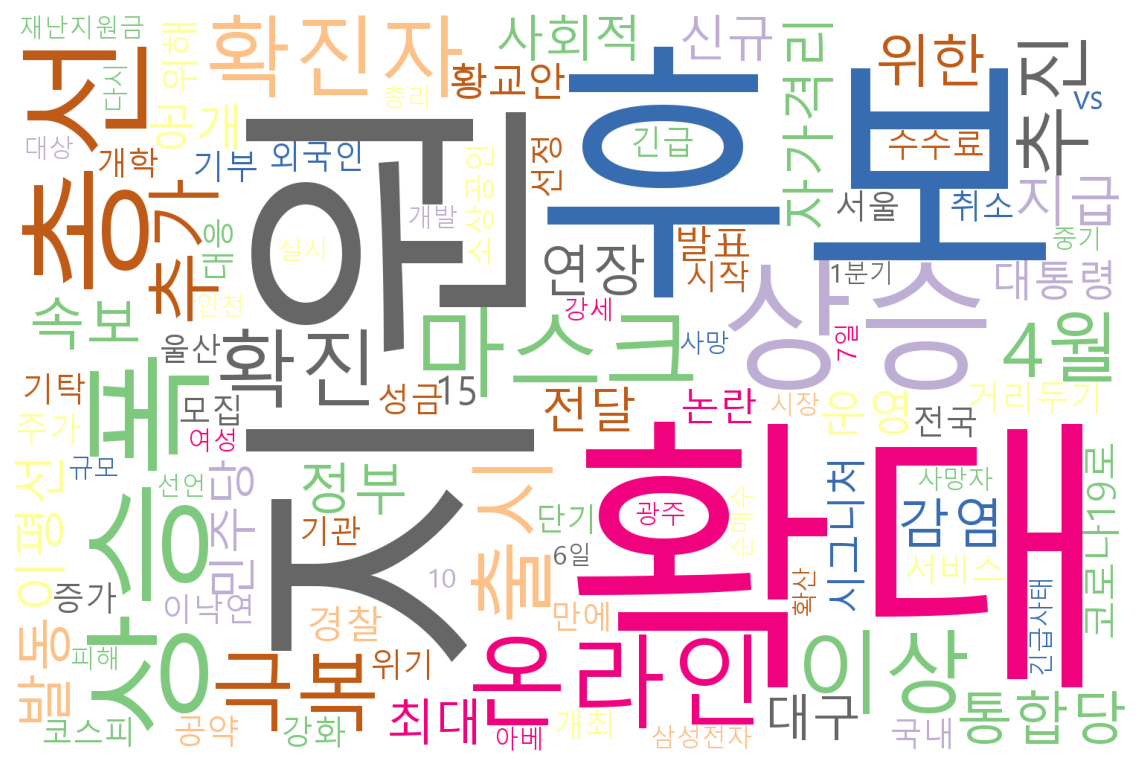

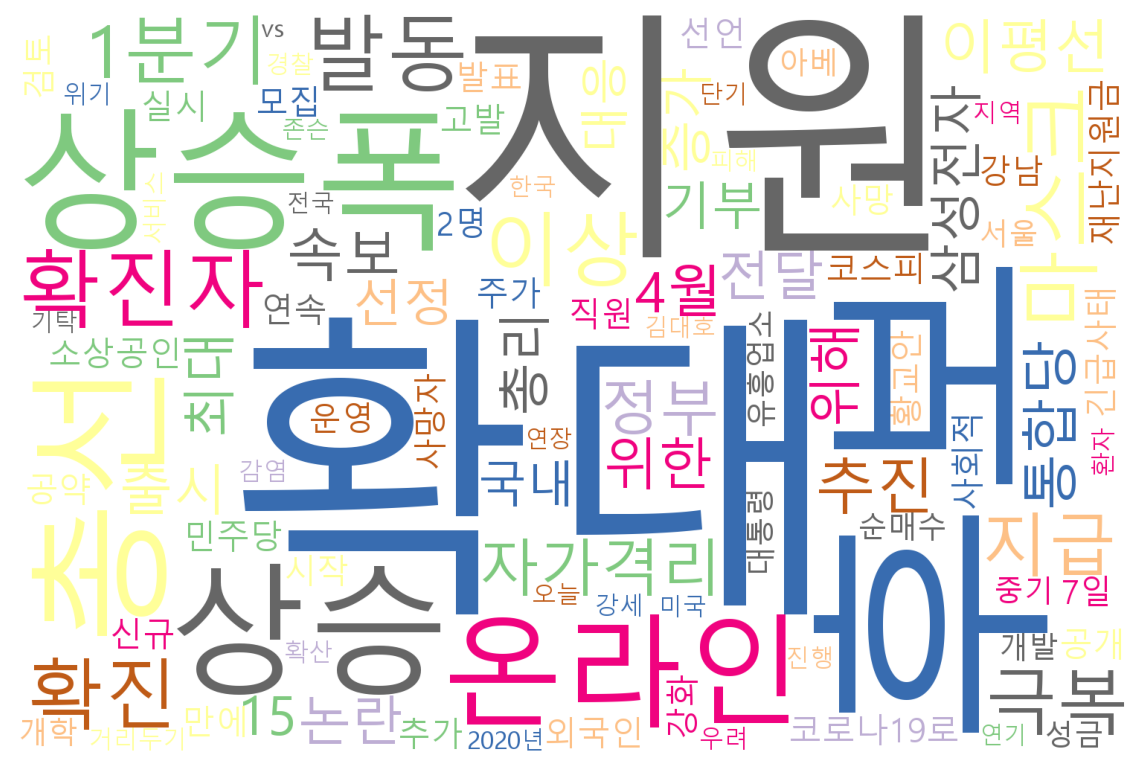

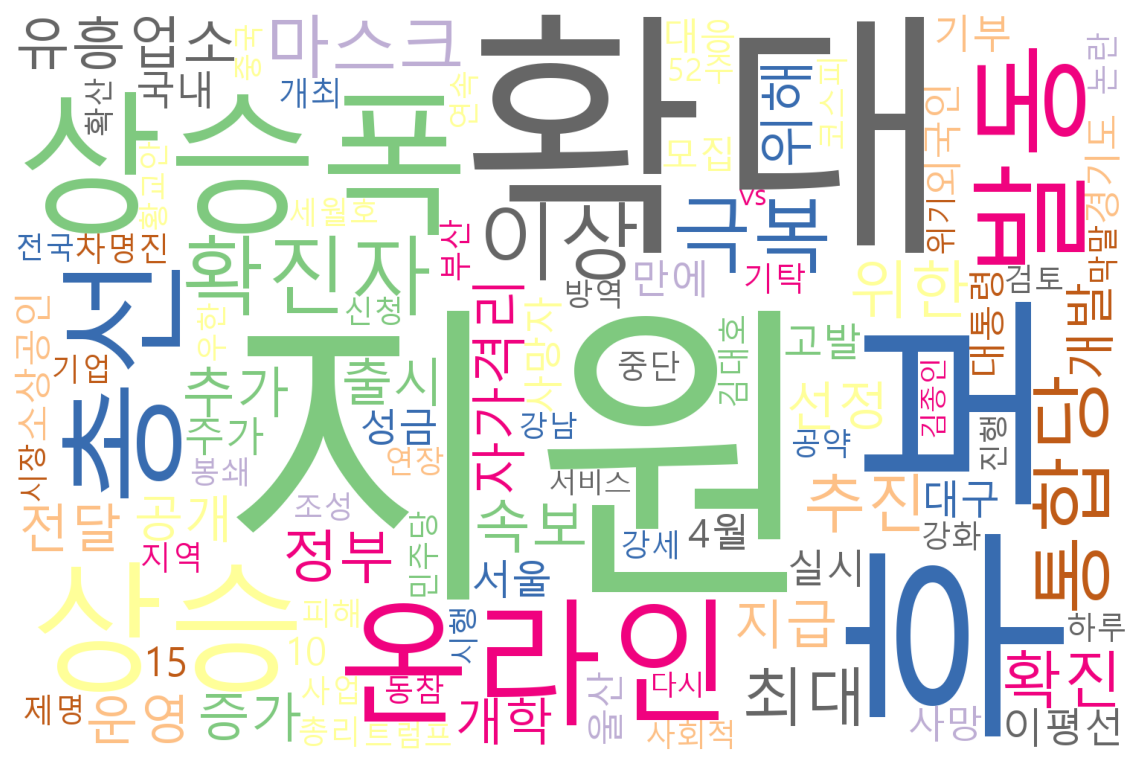

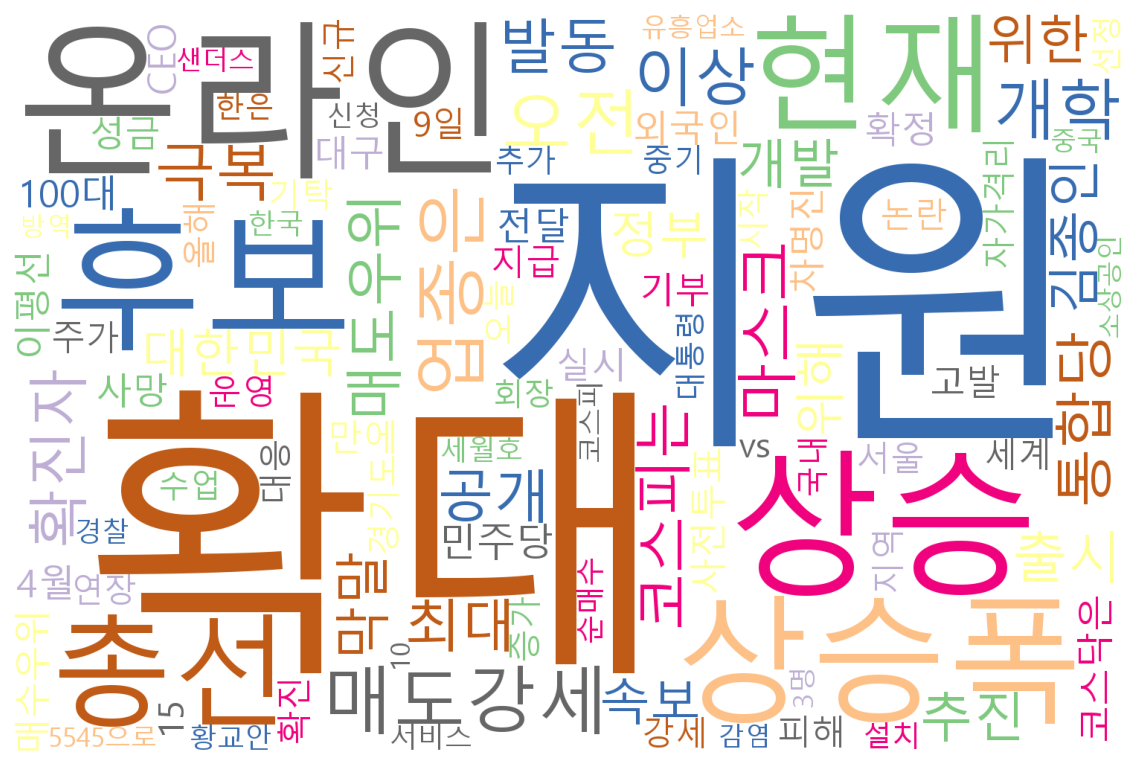

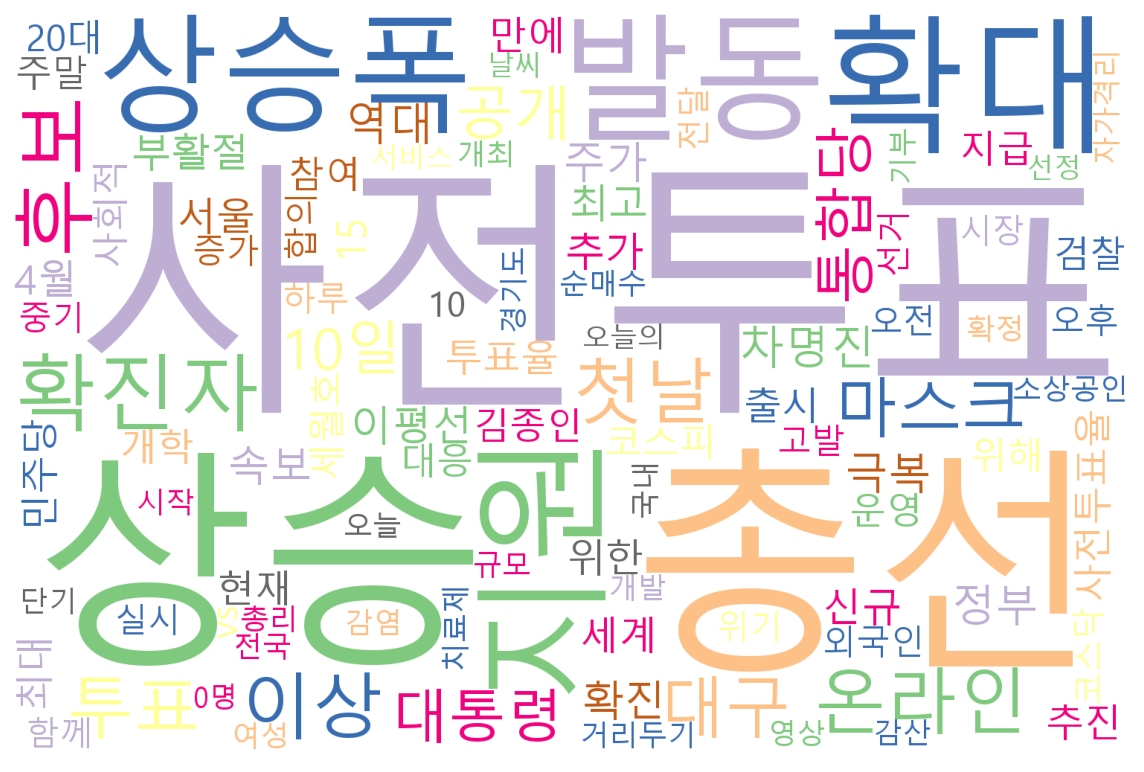

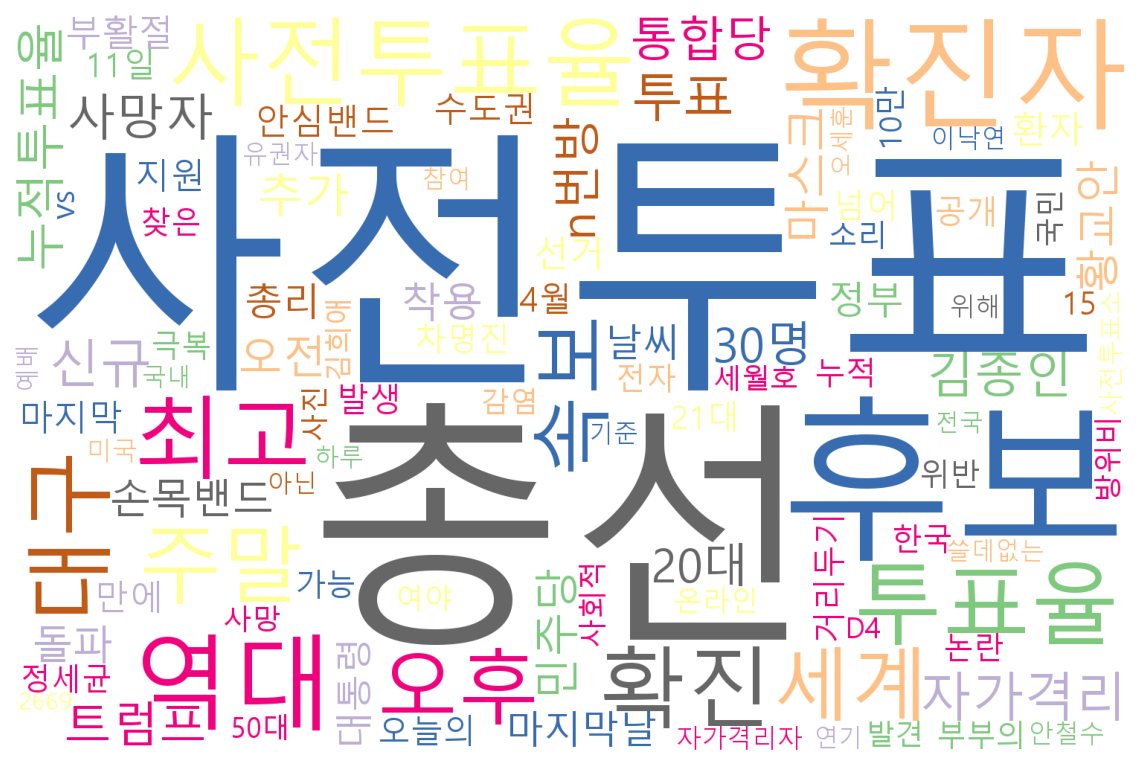

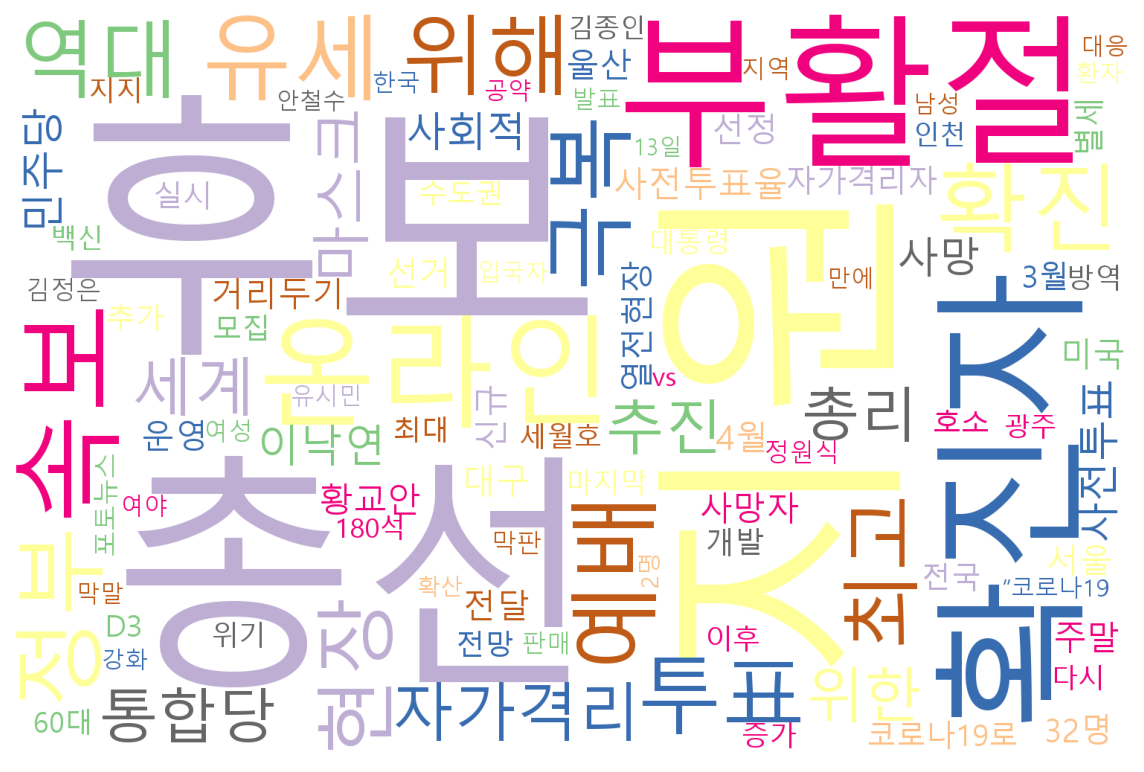

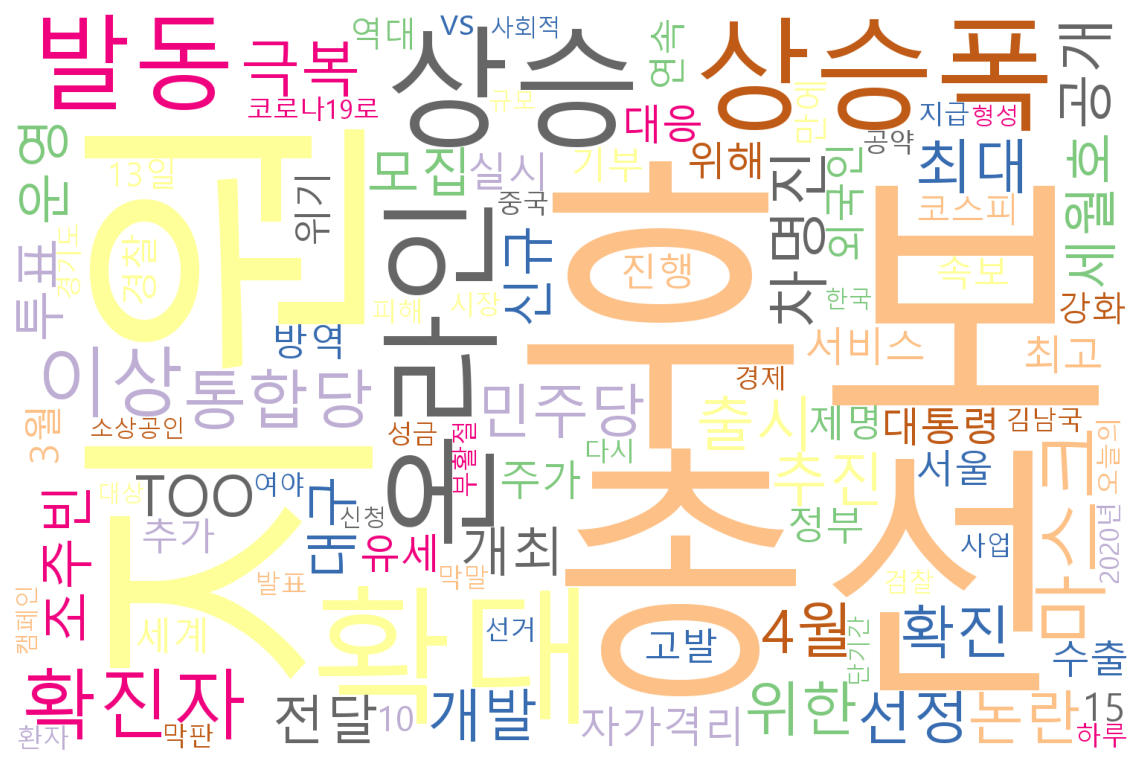

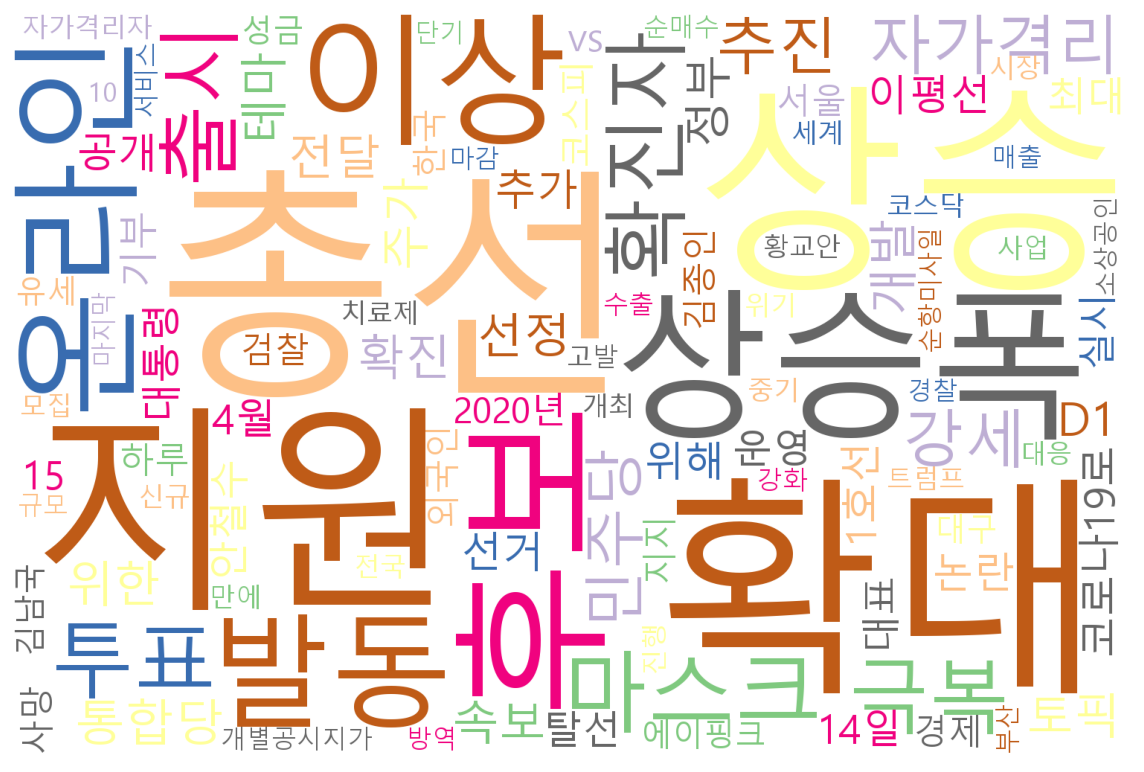

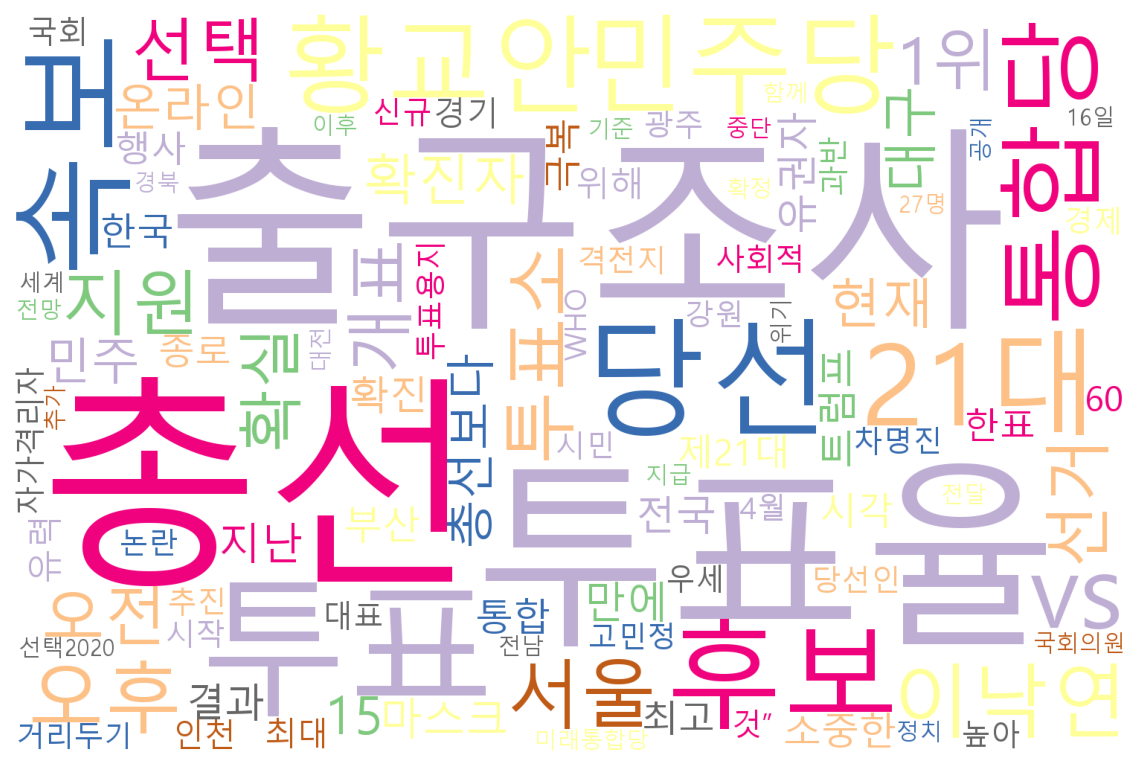

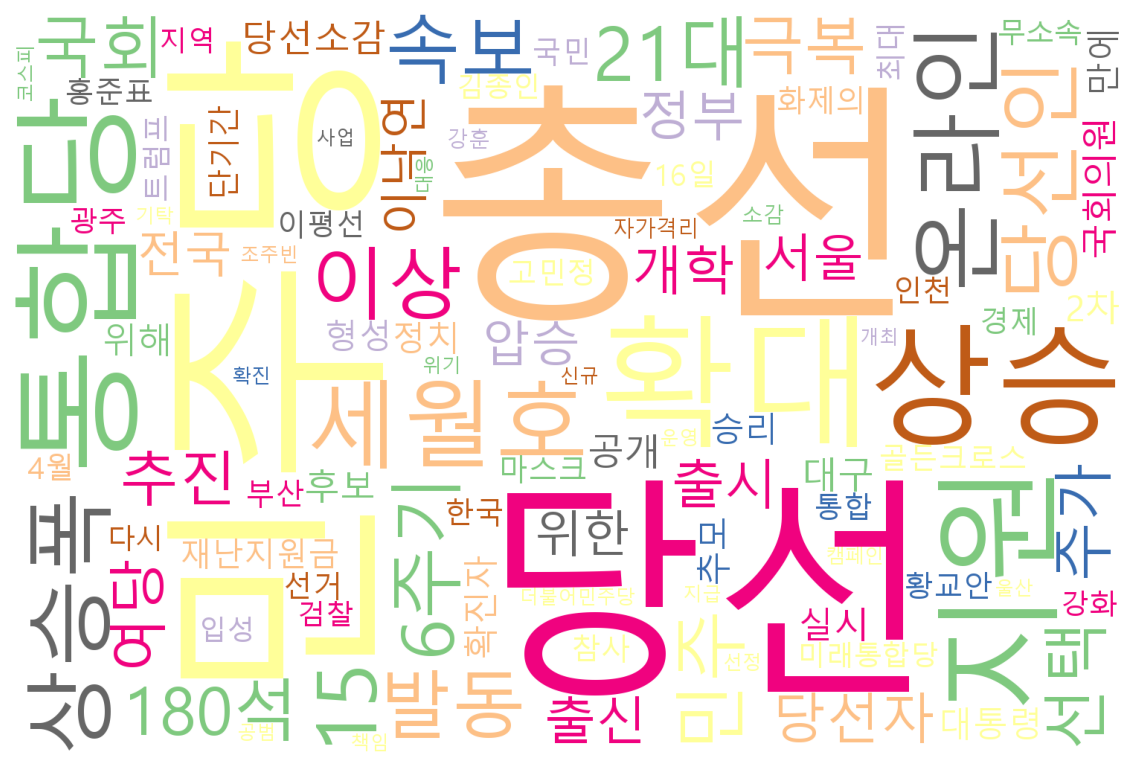

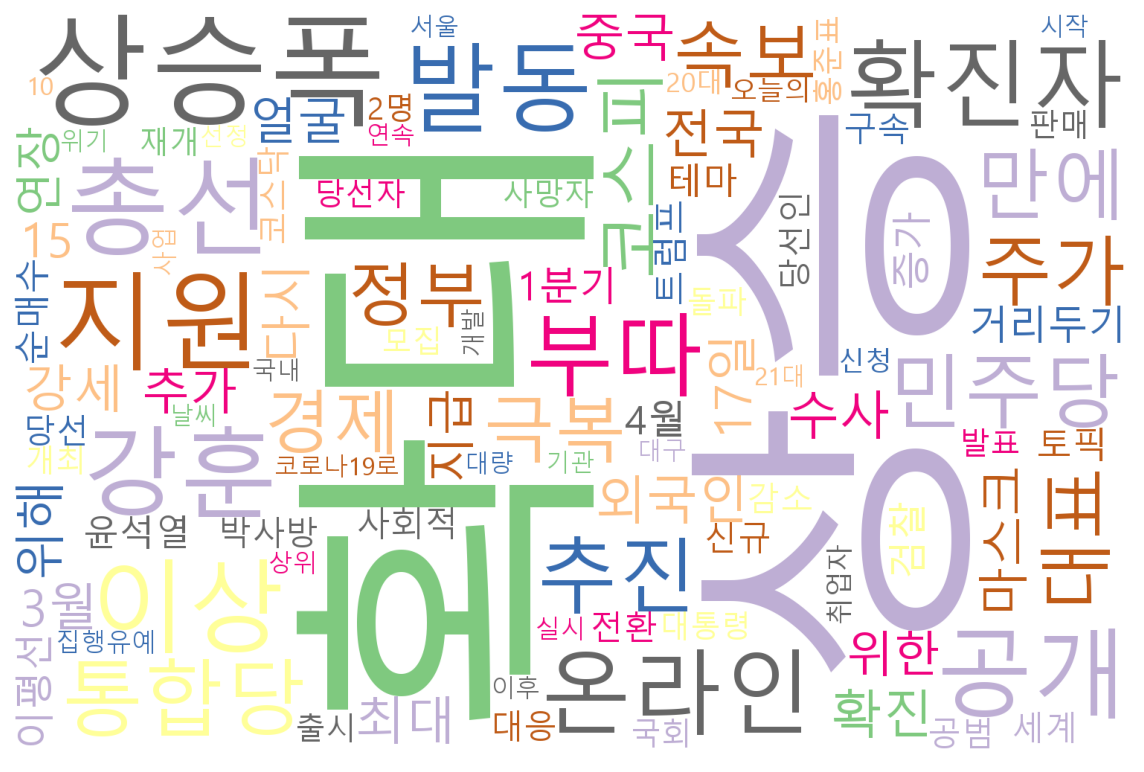

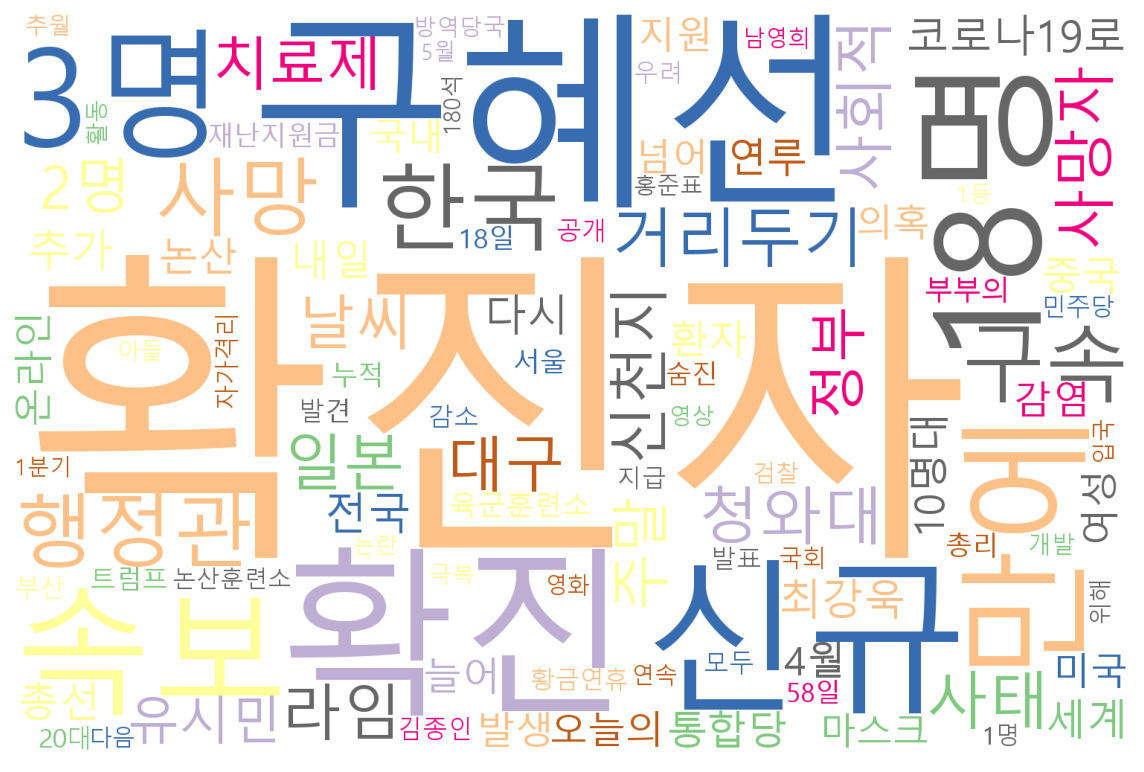

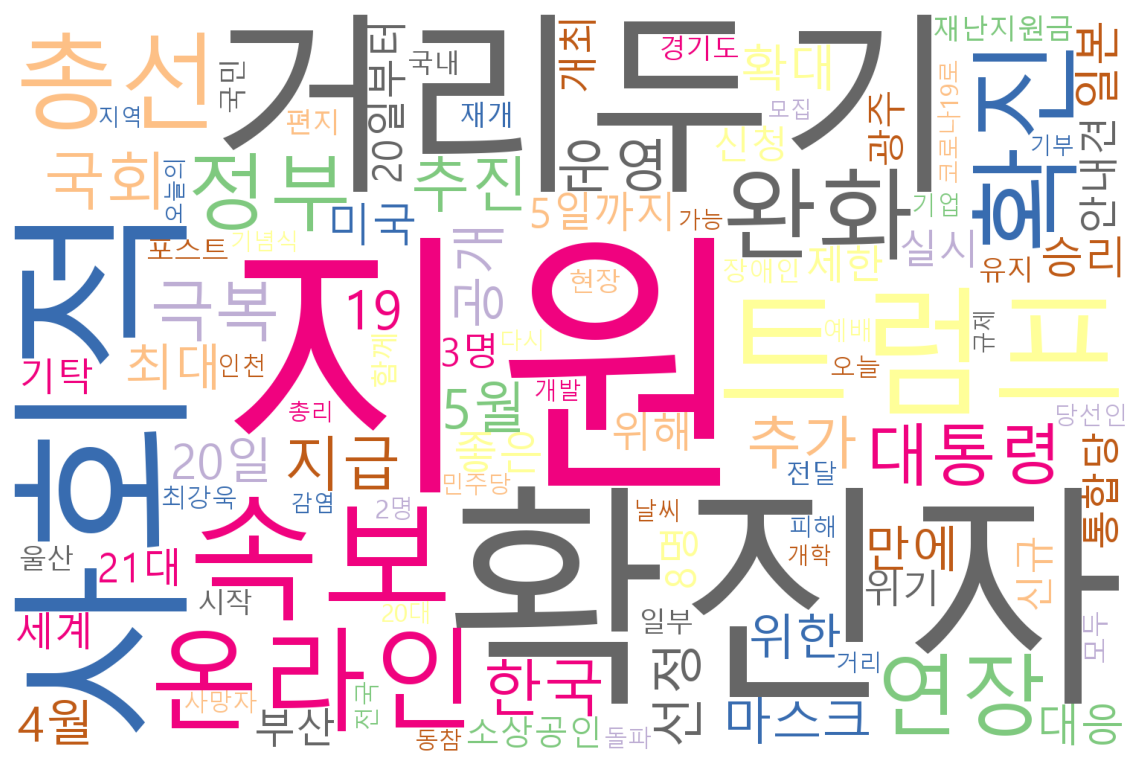

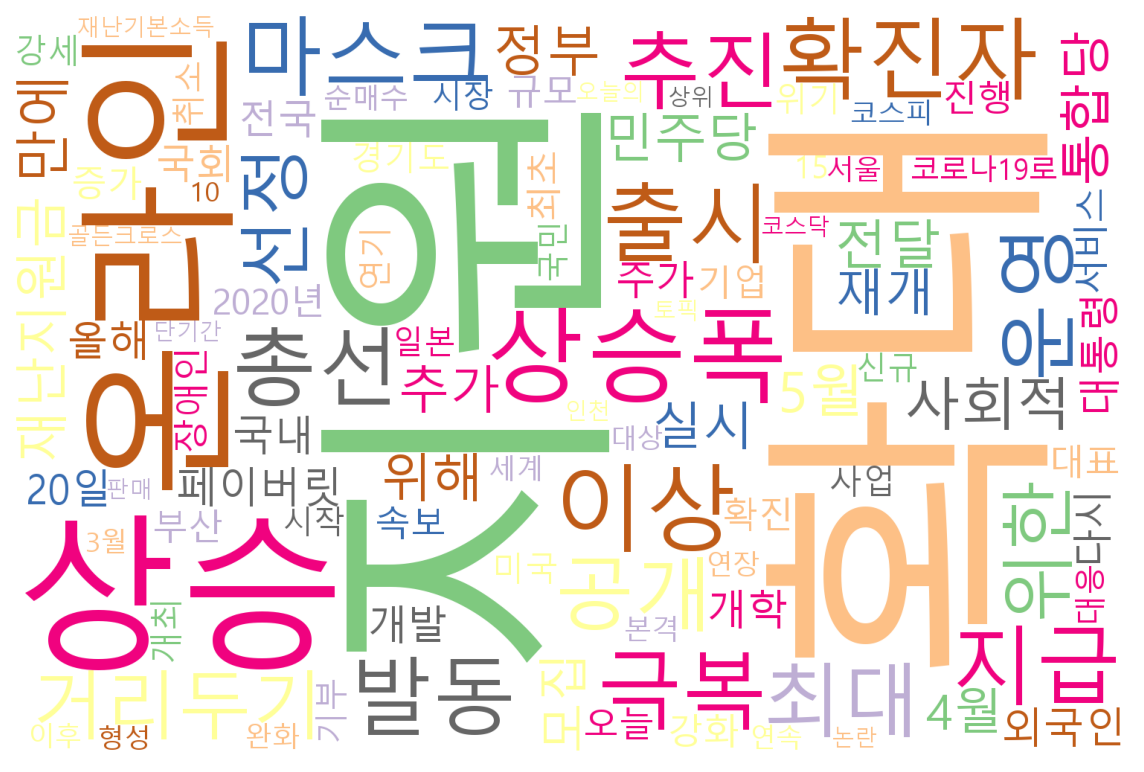

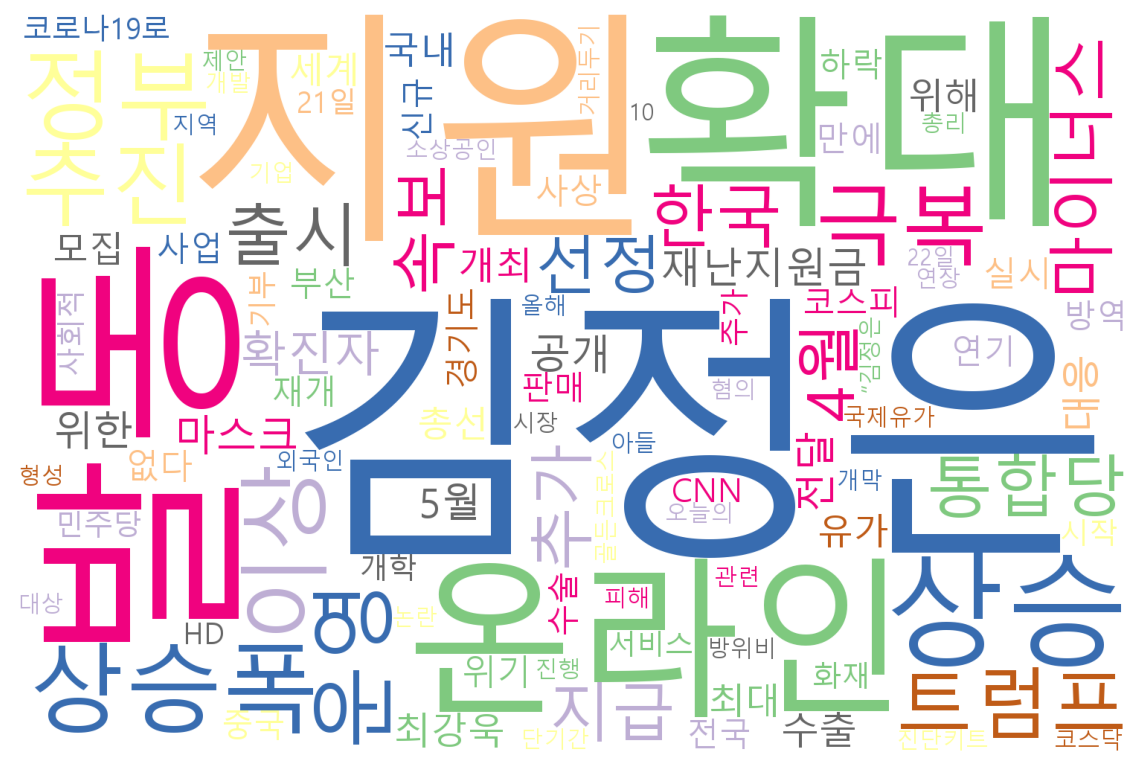

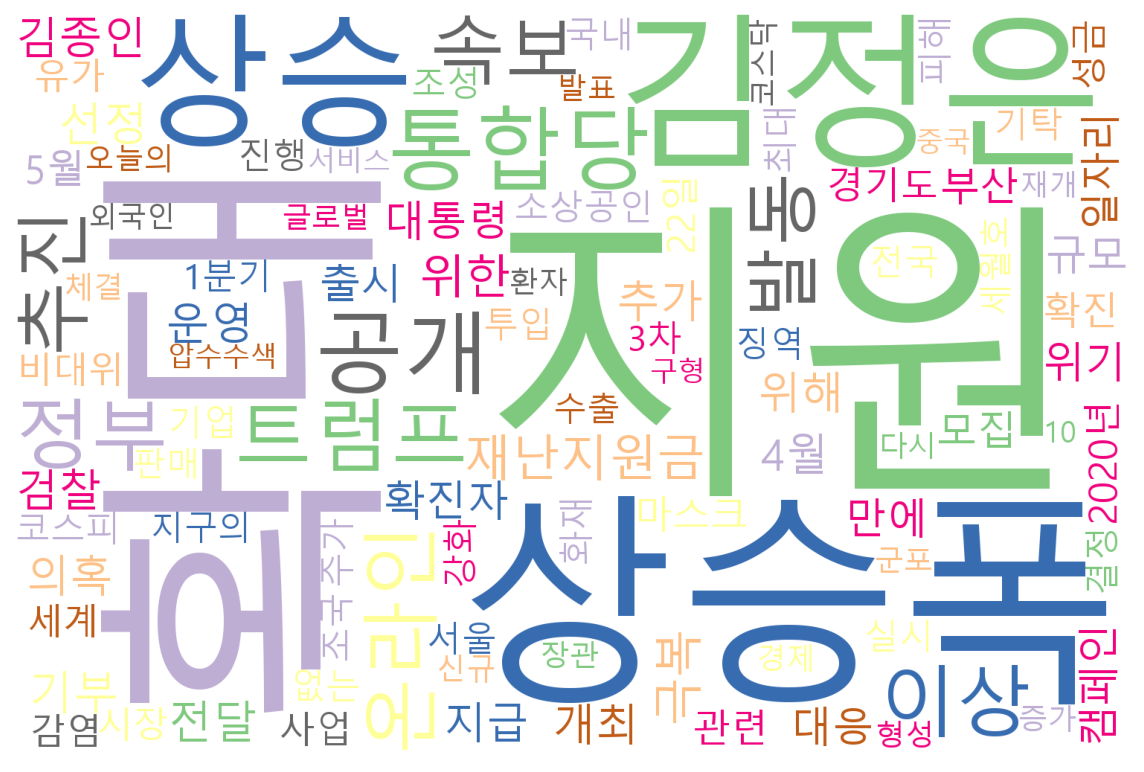

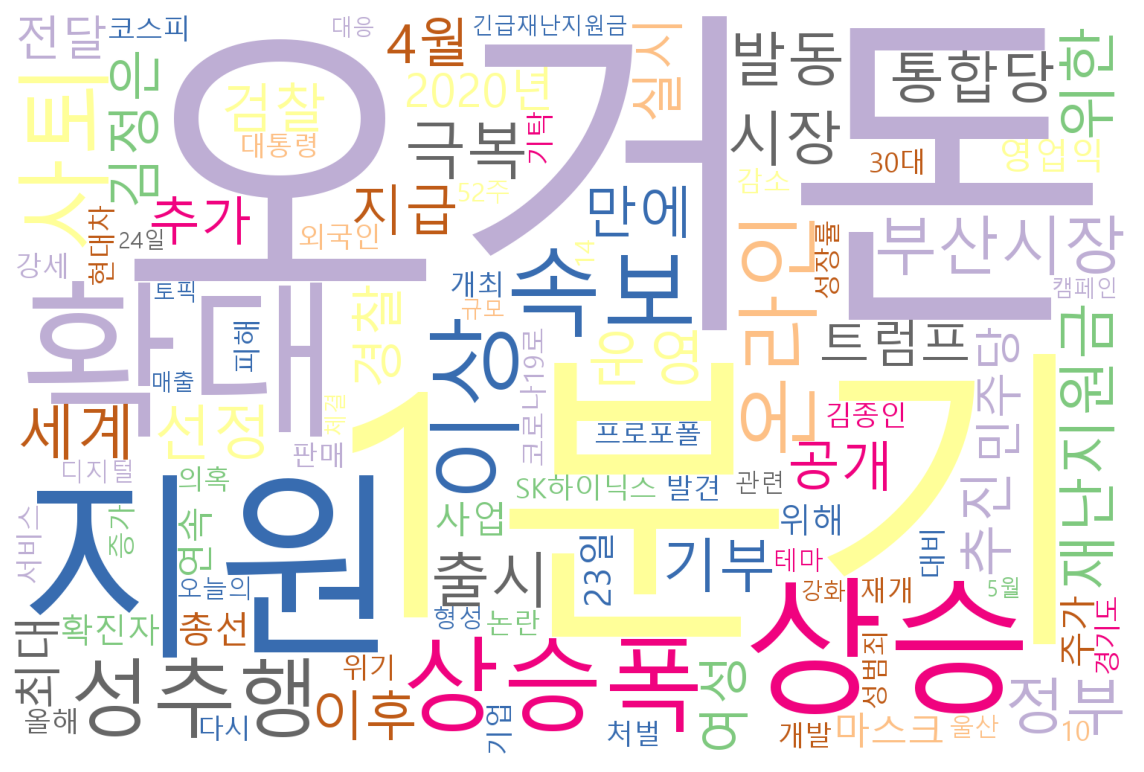

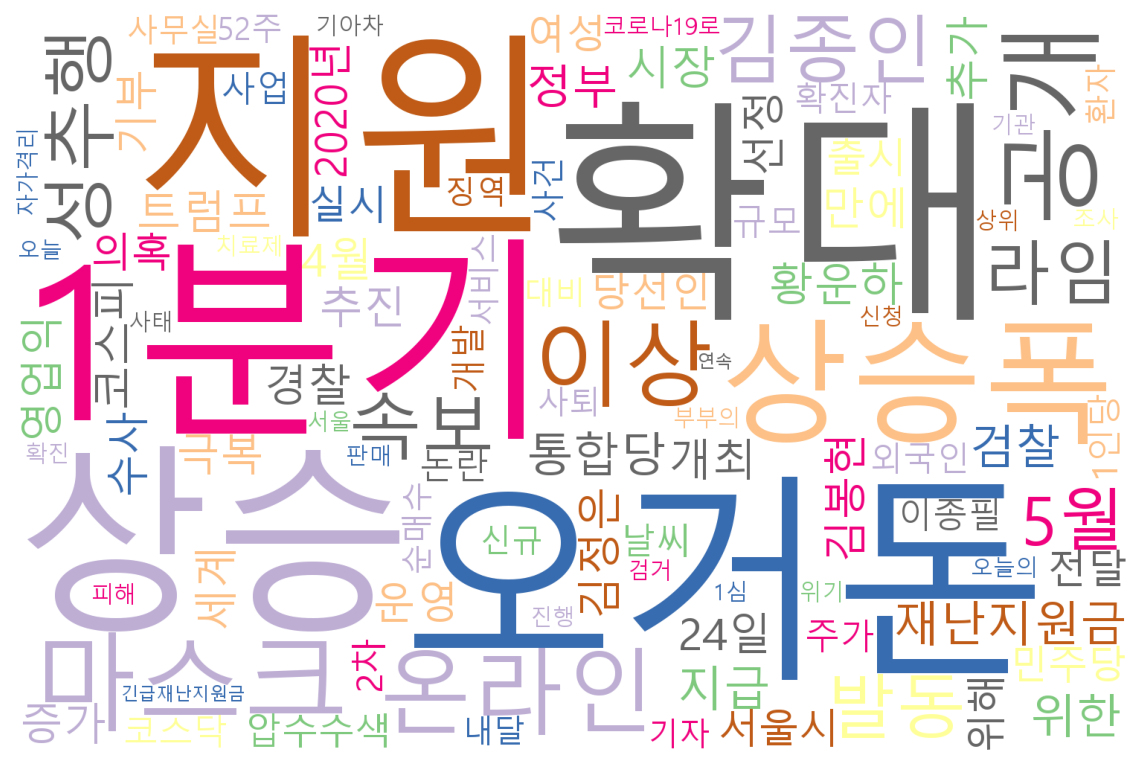

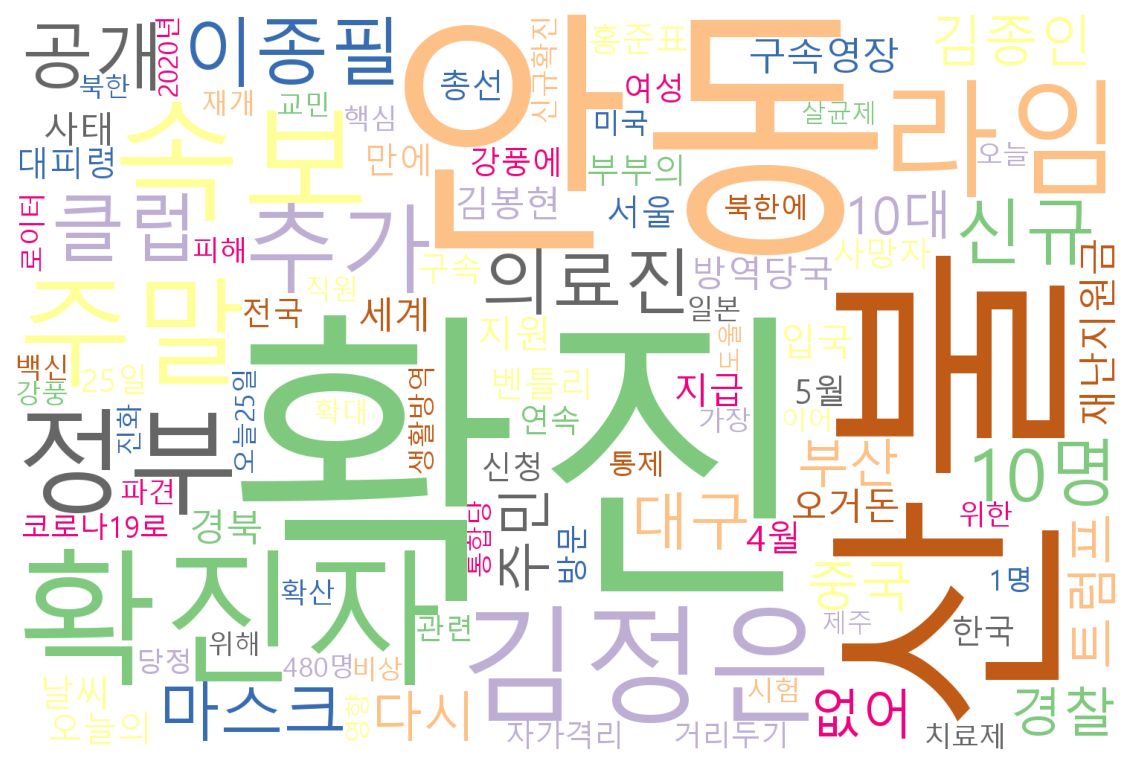

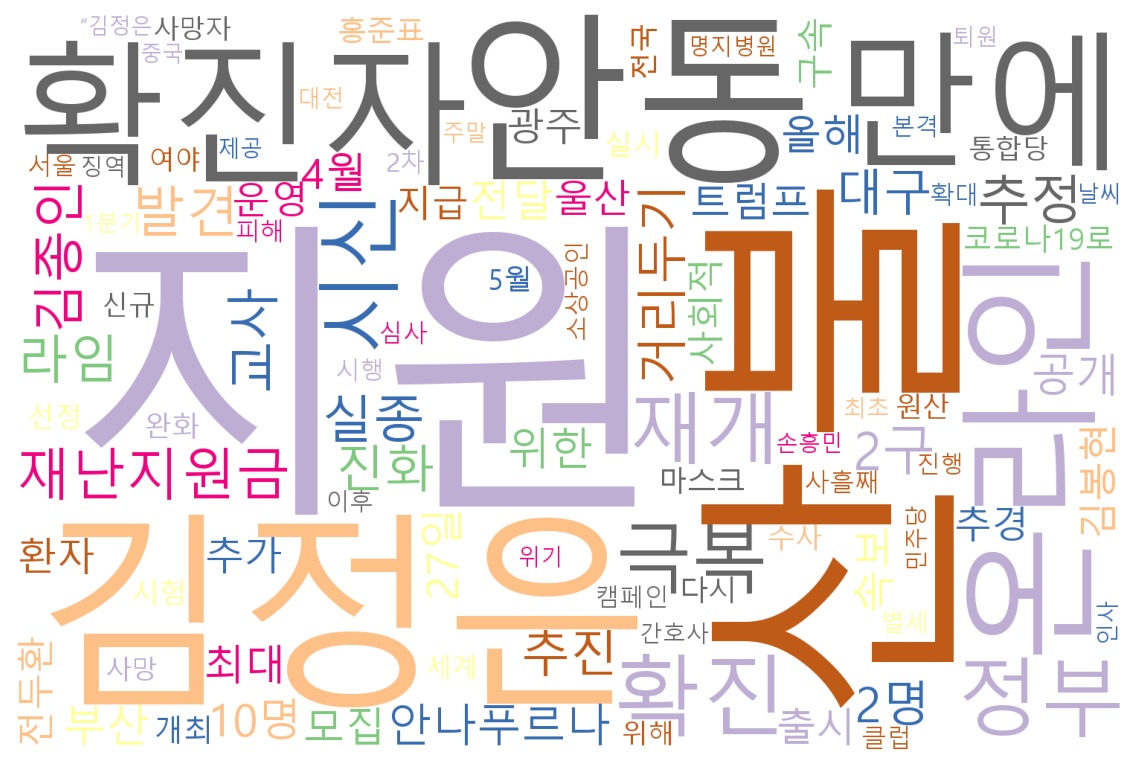

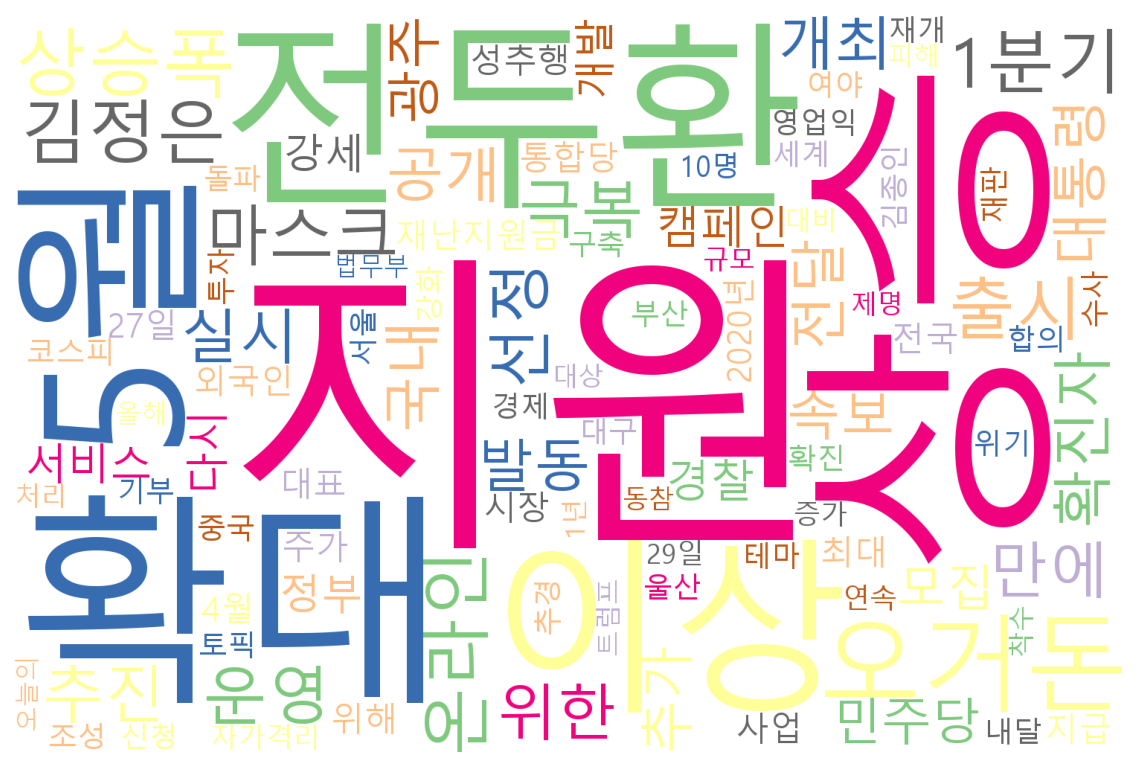

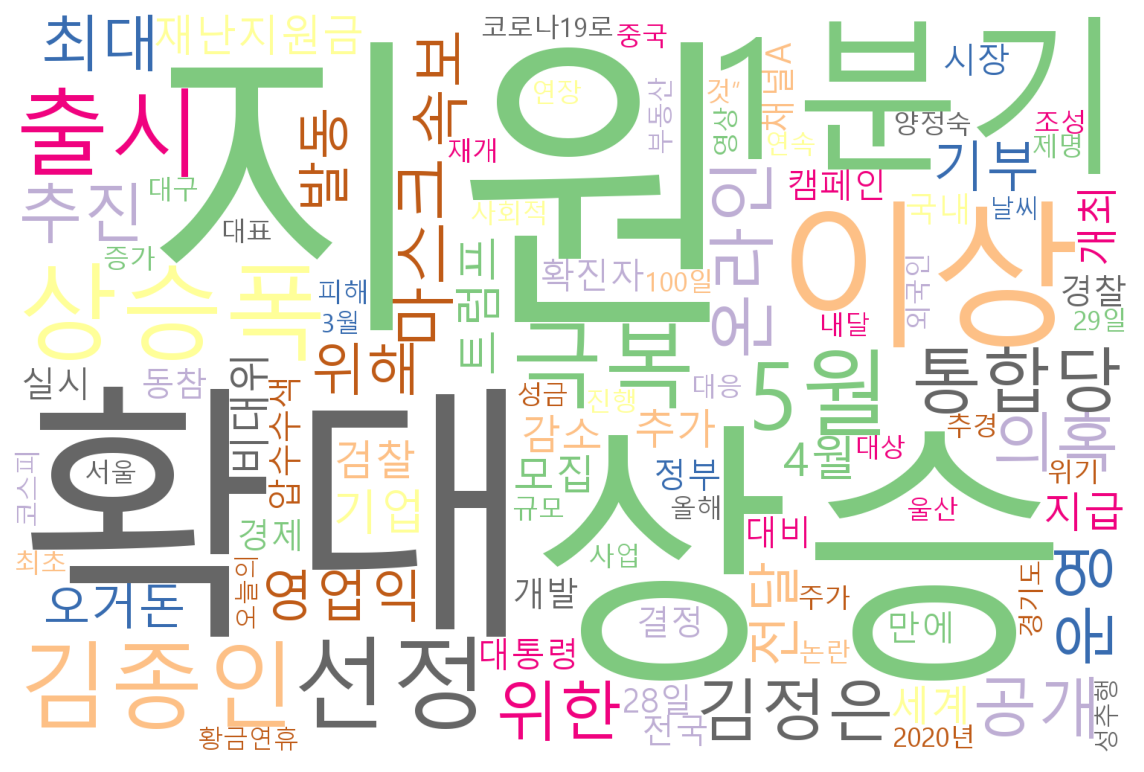

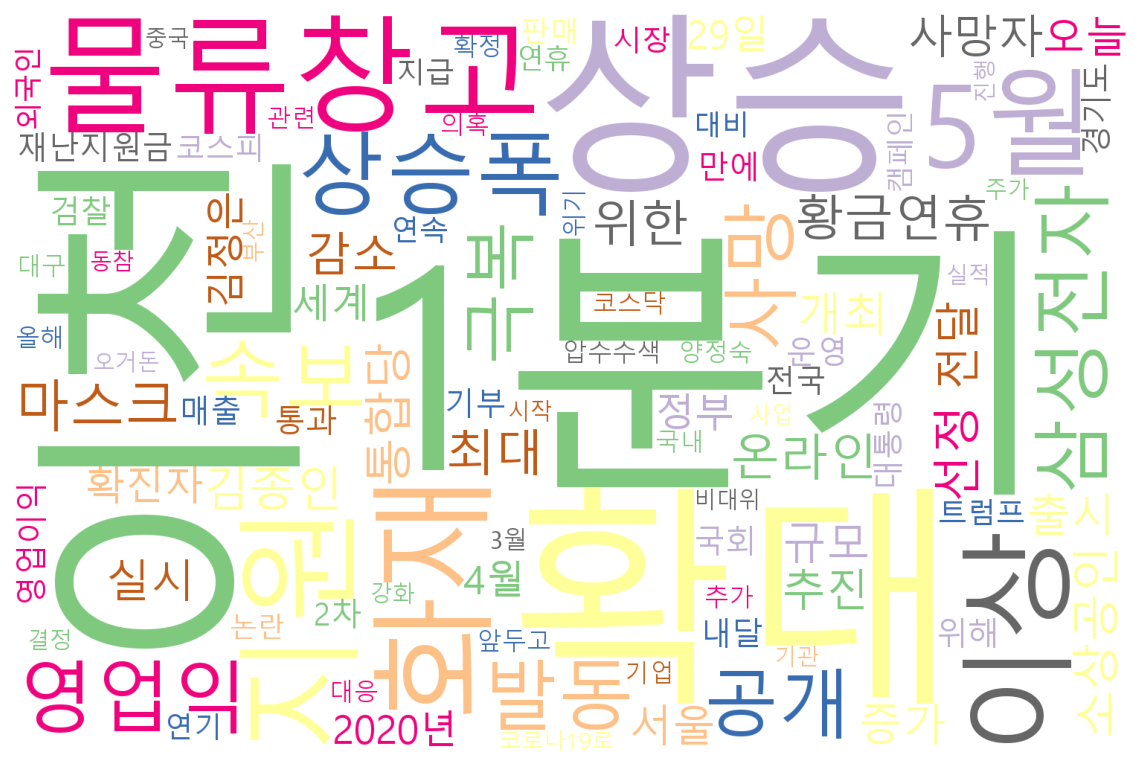

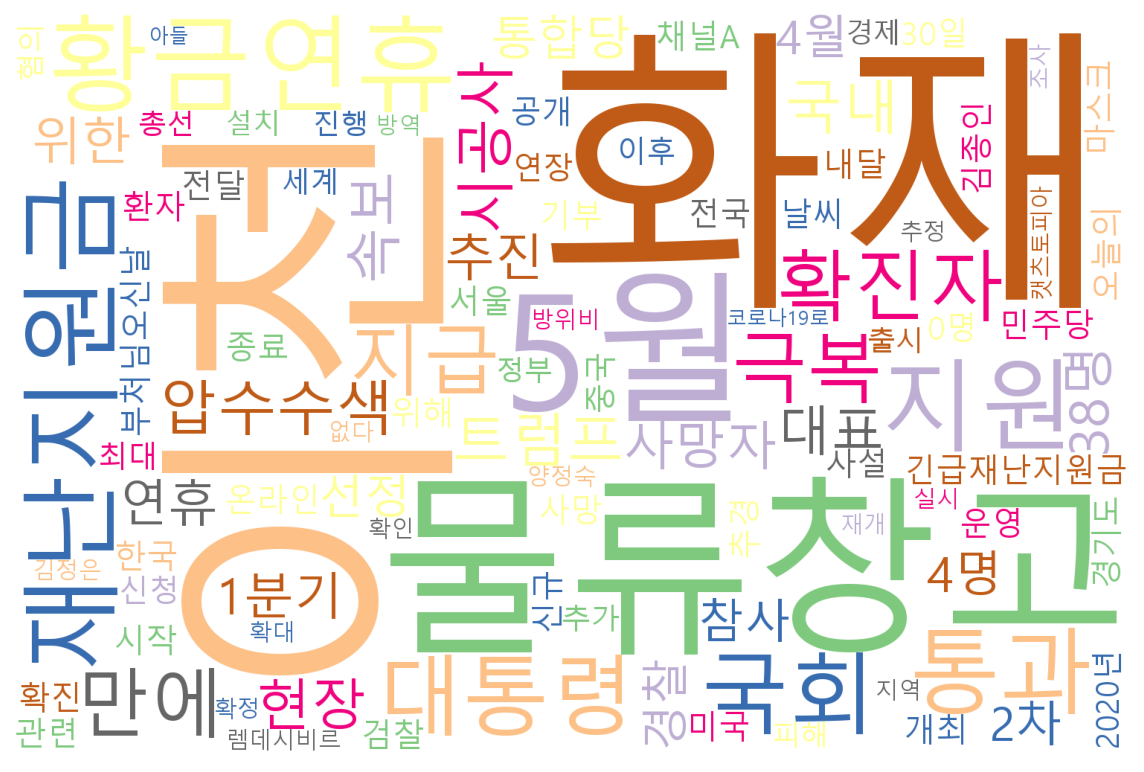

In [34]:
nn = np.arange(1,31)
for n in nn:
    if len(str(n))==1:
        apr = pd.read_excel('c:/Users/soohan/bigcontest/dataset/NewsResult/NewsResult_2020040'+str(n)+'.xlsx')
    else:
        apr = pd.read_excel('c:/Users/soohan/bigcontest/dataset/NewsResult/NewsResult_202004'+str(n)+'.xlsx')
    title_words = title_to_word(apr)
    draw_wordcloud(title_words,n)